In [2]:
from qiskit import *

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService

with open("ibmapi.txt", "r") as f:
    token = f.read().strip()

QiskitRuntimeService.save_account(
    token=token,
    instance="Practice",
    set_as_default=True,
    overwrite=True  # Allow overwriting the existing account
)

service = QiskitRuntimeService()


In [4]:
from qiskit_aer import Aer

In [5]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [6]:
provider = service.backends()

In [7]:
provider

[<IBMBackend('ibm_torino')>, <IBMBackend('ibm_brisbane')>]

In [8]:
for backend in provider:
    name = backend.name
    qubits = backend.num_qubits
    status = backend.status().operational
    pending_jobs = backend.status().pending_jobs
    print(f"Backend: {name}, Qubits: {qubits}, Operational: {status}, Pending Jobs: {pending_jobs}")

Backend: ibm_torino, Qubits: 133, Operational: True, Pending Jobs: 5295
Backend: ibm_brisbane, Qubits: 127, Operational: True, Pending Jobs: 2099


In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qreg = QuantumRegister(2, "q")
creg = ClassicalRegister(2, "c")
qc = QuantumCircuit(qreg, creg)

In [ ]:
qc.h(qreg[0])
qc.cx(qreg[0], qreg[1])
qc.measure([qreg[0], qreg[1]], [creg[0], creg[1]])

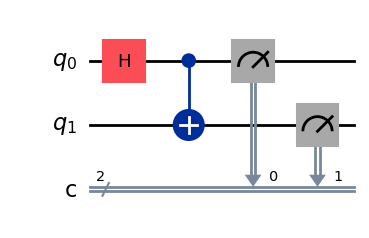

In [23]:
# %inline matplotlib

qc.draw(output='mpl')

In [24]:
job = Aer.get_backend('qasm_simulator').run(qc, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'11': 500, '00': 524}


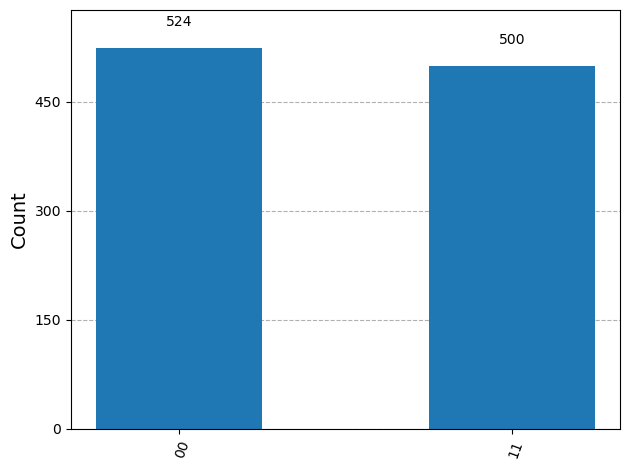

In [25]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)


In [26]:
backend = service.backend("ibm_brisbane")

IBM Quantum now requires you to transpile your circuit for the backend before running it.

Solution:
Transpile your circuit for the backend using Qiskit’s ‎`transpile` function.

In [27]:
from qiskit import transpile
transpiled_qc = transpile(qc, backend=backend)

`backend.run()` is no longer supported in the latest Qiskit IBM Runtime API.
You now need to use the Qiskit Primitives interface (`Sampler` for measurement counts,`Estimator` for expectation values).

 `Sampler` returns quasi-probabilities, which are similar to counts but may include negative values due to error mitigation. For most simple circuits, they closely resemble actual counts.
 • If you want to run multiple circuits, pass a list: `circuits=[qc1, qc2, ...]`.

In [28]:
from qiskit_ibm_runtime import Sampler

sampler = Sampler(backend)
# You need to pass a list of circuits to `sampler.run()`, even if you have only one circuit.

job = sampler.run([transpiled_qc], shots=1024)


In [29]:
result = job.result()
result

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-08-26 15:16:41', stop='2025-08-26 15:16:42', size=1024>)])}, 'version': 2})

In [34]:
result[0].data

DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=2>))

In [35]:
# Let's assume your circuit's classical register is named 'c'
bitvals = result[0].data.c  # Replace 'c' with your actual classical register name

# Get the counts dictionary
counts = bitvals.get_counts()

print(counts)

{'00': 507, '11': 490, '01': 12, '10': 15}


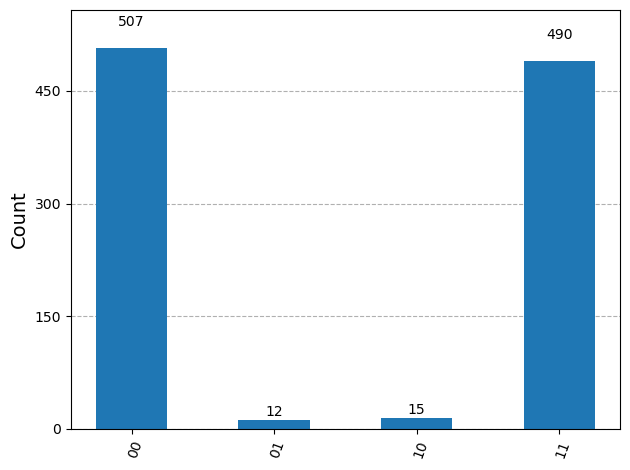

In [36]:
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
plot_histogram(counts)